In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Tujuan Analisis:
1. Mencari rekomendasi game yang relevan, serupa, dan sesuai dengan preferensi pengguna, dengan memanfaatkan atribut seperti genre, platform, dan rating. 

In [151]:
# Load dataset 
df = pd.read_csv('C:/KULIAH/SEMESTER 3/Machine Learning/UAS/DATASET/3A.tsv', sep='\t')
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-706.0,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,-92.0,NaN,NaN


In [152]:
# A). Exploratory Data Anaylysis
# 1. Check Data type, missing values, dan distribution data 
eda_summary = {
    "Data Types": df.dtypes,
    "Missing Values": df.isnull().sum(),
}

# Statistik deskriptif untuk kolom numerik
numeric_summary = df.describe()

eda_summary, numeric_summary

({'Data Types': index                int64
  Name                object
  Platform            object
  Year_of_Release      int64
  Genre               object
  Publisher           object
  NA_Sales           float64
  EU_Sales           float64
  JP_Sales           float64
  Other_Sales        float64
  Global_Sales       float64
  Critic_Score       float64
  Critic_Count       float64
  User_Score          object
  User_Count         float64
  Developer           object
  Rating              object
  dtype: object,
  'Missing Values': index                 0
  Name                  2
  Platform              0
  Year_of_Release       0
  Genre                 2
  Publisher            55
  NA_Sales              0
  EU_Sales              0
  JP_Sales              0
  Other_Sales           0
  Global_Sales          0
  Critic_Score       8668
  Critic_Count       8668
  User_Score         6769
  User_Count            0
  Developer          6688
  Rating             6836
  dtype: int64},

## Data Type

### **1. Numerical Data**
1. **index (`int64`)**:Representasi nomor baris unik untuk setiap entri game di dataset.

2. **Year_of_Release (`float64`)**:Tahun perilisan game.

3. **NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales (`float64`)**:
   - **NA_Sales**: Penjualan di wilayah Amerika Utara (dalam juta unit).
   - **EU_Sales**: Penjualan di wilayah Eropa (dalam juta unit).
   - **JP_Sales**: Penjualan di wilayah Jepang (dalam juta unit).
   - **Other_Sales**: Penjualan di wilayah lain (dalam juta unit).
   - **Global_Sales**: Total penjualan global (penjumlahan semua wilayah).
   - Kolom ini mewakili performa penjualan game berdasarkan wilayah.

4. **Critic_Score (`float64`)**: Skor dari kritikus, biasanya dalam skala 0-100.

5. **Critic_Count (`float64`)**: Jumlah ulasan dari kritikus.

6. **User_Score (`float64`)**: Skor dari pengguna, biasanya dalam skala 0-10.

7. **User_Count (`float64`)**:Jumlah ulasan dari pengguna.

### **2. Categorical Data**
1. **Name (`object`)**:Identitas unik yang mewakili setiap entri game.

2. **Platform (`object`)**: Platform tempat game dirilis (misalnya, Wii, NES, PC).

3. **Genre (`object`)**:Genre game (misalnya, Action, Sports, Shooter).

4. **Publisher (`object`)**:Penerbit game.

5. **Developer (`object`)**: Pengembang game.

6. **Rating (`object`)**: Rating umur game (misalnya, E, M, T) sebagai pembatasan usia.

7. **Publisher_Category (`object`)**:Kategori penerbit (misalnya, AAA atau indie).
 
8. **Developer_Category_Sales (`object`)**: Kategori penjualan berdasarkan pengembang. Menunjukkan tingkat kontribusi pengembang terhadap pasar game.

### **1. Missing Values (Data Hilang)**:

1. **Name (2 missing values)**:
 
2. **Genre (2 missing values)**:

3. **Publisher (55 missing values)**:
 
4. **Critic_Score (8668 missing values)**:

5. **Critic_Count (8668 missing values)**:

6. **User_Score (6769 missing values)**:
   
7. **Developer (6688 missing values)**:
  
8. **Rating (6836 missing values)**

### **2. Summary Statistics**
1. **Year_of_Release**:
   - **Rata-rata**: 1974, namun ini tampaknya keliru karena data min menunjukkan `1`, yang tidak mungkin tahun perilisan.

2. **NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales**:
   - **Rata-rata Global_Sales**: 0.539 juta unit per game.
   - Penjualan di wilayah Amerika Utara (NA_Sales) cenderung lebih tinggi dibandingkan wilayah lain.

3. **Critic_Score**:
   - **Rata-rata**: 69.04 (skala 0-100), menunjukkan kualitas rata-rata game yang cukup baik.
   - **Min**: 13, menunjukkan ada game yang mendapat penilaian sangat buruk.

4. **Critic_Count**:
   - **Rata-rata**: 26 ulasan per game.
   - **Max**: 113 ulasan

5. **User_Score**:
   - **Rata-rata**: Tidak valid karena beberapa entri memiliki skor negatif, seperti `-195.79`.

6. **User_Count**:
   - **Rata-rata**: -195.79, nilai negatif

In [153]:
# Melihat nilai unik untuk setiap kolom
for col in df.columns:
    print(f"Nilai unik dalam kolom '{col}':")
    print(df[col].unique())
    print("\n")

Nilai unik dalam kolom 'index':
[    0     1     2 ... 16925 16926 16927]


Nilai unik dalam kolom 'Name':
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


Nilai unik dalam kolom 'Platform':
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Nilai unik dalam kolom 'Year_of_Release':
[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000    6 1995 1991 1981 1987 1980    8 1983    7    1    4
    2    5   10    3    9 2020 2017]


Nilai unik dalam kolom 'Genre':
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


Nilai unik dalam kolom 'Publisher':
['Nintendo' 'Microsoft Game St

In [164]:
# Perbaikan incosistent data 
# 1. Rating
df['Rating'] = df['Rating'].replace('K-A', 'E')

# 2. Year_of_Release
valid_years = (df['Year_of_Release'] >= 1980) & (df['Year_of_Release'] <= 2025)
df.loc[~valid_years, 'Year_of_Release'] = None  # Ganti invalid dengan NAN
df['Year_of_Release'] = df['Year_of_Release'].fillna(df['Year_of_Release'].median())

# 3. User_Score
df['User_Score'] = df['User_Score'].replace('tbd', None).astype(float)  # Replace 'tbd' and convert to numeric
df['User_Score'] = df['User_Score'].apply(lambda x: x if x >= 0 else None)

# 4. User_Count
df['User_Count'] = df['User_Count'].apply(lambda x: x if x > 0 else None)  # Replace negative values with NaN

# 5. Name
df['Name'] = df['Name'].str.title()

# Perbaikan Tipe Data
# 1. User_Score
df['User_Score'] = df['User_Score'].astype(float)

In [155]:
df.isnull().sum()

index                 0
Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         9210
User_Count         9210
Developer          6688
Rating             6836
dtype: int64

In [165]:
# Handling Missing Values
numerical_columns = ['Critic_Score', 'Critic_Count', 
                     'User_Score', 'User_Count']

# Impute Missing Values dengan Median untuk Numerical Columns
for column in numerical_columns:
    if column in df.columns:  # Pastikan kolom ada di dataframe
        df[column] = df[column].fillna(df[column].median())

# Impute Missing Values dengan Mode untuk Categorical Columns
categorical_columns = ['Name', 'Genre', 'Publisher', 'Developer', 'Rating']
for column in categorical_columns:
    if column in df.columns:  # Pastikan kolom ada di dataframe
        df[column] = df[column].fillna(df[column].mode()[0])

In [166]:
df.isnull().sum()

index                 0
Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer             0
Rating                0
Publisher_Category    0
combined_features     0
dtype: int64

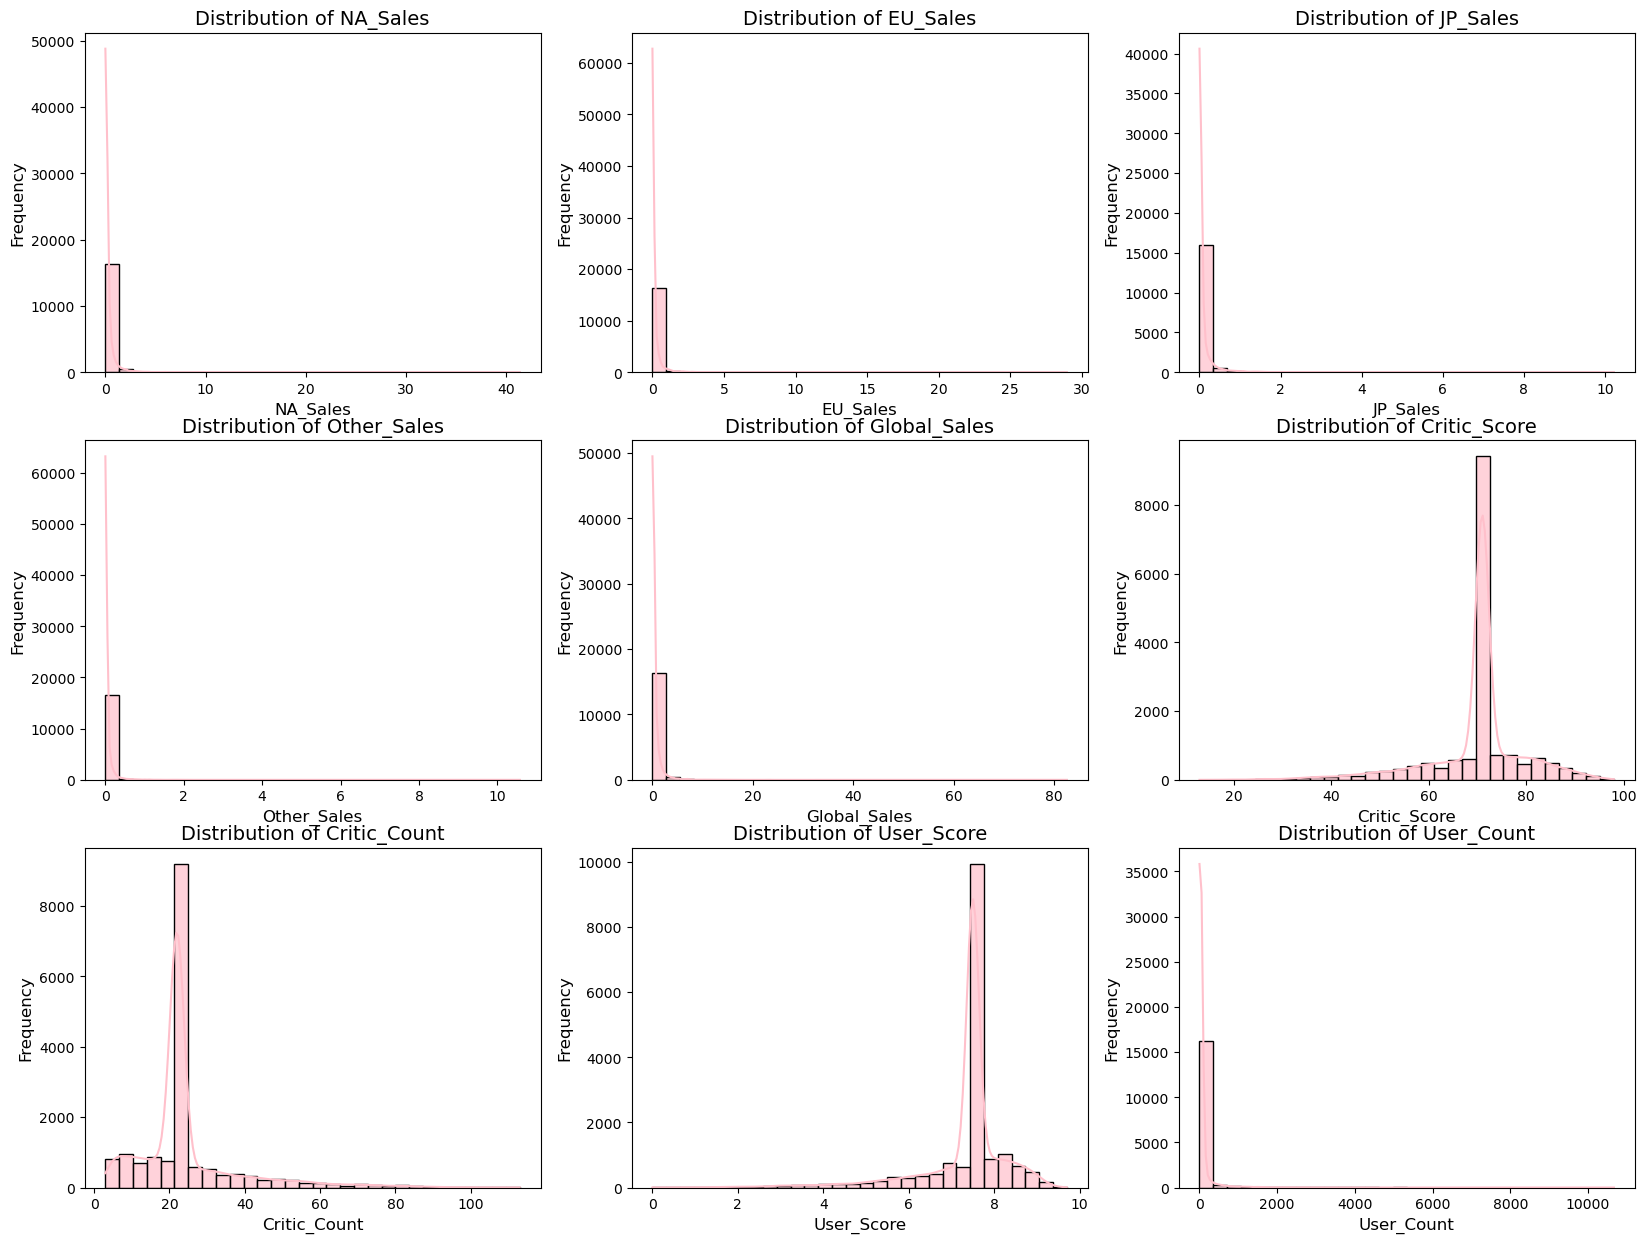

In [167]:
# Distribution numerical variables
numerical_columns = [
    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
    'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'
]

# Set up the plot size
plt.figure(figsize=(20, 15))

# Create distribution plots for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='pink', alpha=0.7)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.show()

Dari visualisasi distribusi variabel numerik di atas:

1. **NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales**:
   - **Distribusi sangat skewed ke kanan (positif skewed)**.
   - Mayoritas nilai penjualan di semua wilayah sangat rendah (mendekati nol), menunjukkan bahwa sebagian besar game memiliki penjualan yang kecil.
   - Ada sedikit game yang memiliki nilai penjualan yang sangat besar, yang menjadi outlier pada data ini.

2. **Critic_Score**:
   - Distribusi terlihat lebih simetris dibandingkan variabel lainnya.
   - Sebagian besar skor berada di kisaran **60 hingga 80**, menunjukkan bahwa mayoritas game mendapatkan penilaian yang cukup baik dari kritikus.
   - Hampir tidak ada skor di bawah 20 atau di atas 90.

3. **Critic_Count**:
   - Sebagian besar nilai berada di sekitar angka **20 ulasan**, menunjukkan bahwa mayoritas game mendapatkan jumlah ulasan yang terbatas.
   - Ada beberapa game dengan jumlah ulasan yang jauh lebih tinggi, yang merupakan **outlier**.

4. **User_Score**:
   - Sebagian besar skor pengguna terkonsentrasi pada rentang **7 hingga 8**, yang menunjukkan bahwa mayoritas pengguna memberikan ulasan positif.
   - Distribusi ini cenderung lebih normal dibandingkan dengan variabel lainnya.

5. **User_Count**:
   - Distribusi sangat skewed ke kanan.
   - Sebagian besar game memiliki jumlah ulasan pengguna yang sangat rendah (mendekati nol).
   - Hanya sedikit game yang mendapatkan ulasan dari ribuan pengguna, yang merupakan outlier.

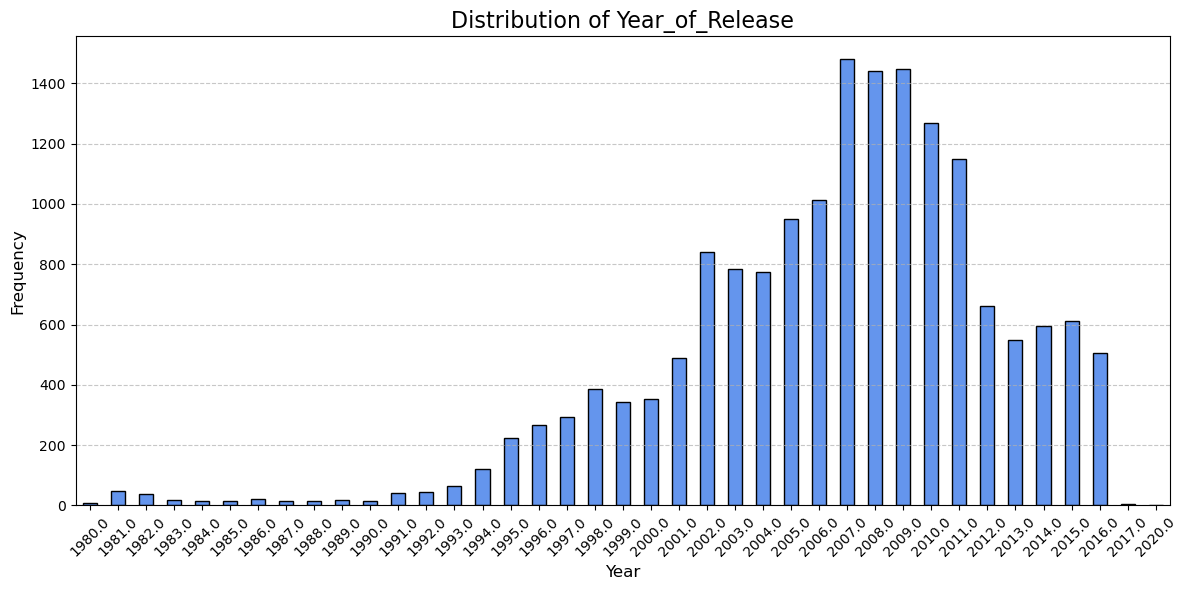

In [168]:
# Distribusi Year_of_Release
# Plot ulang distribusi Year_of_Release dengan penanganan yang lebih aman
plt.figure(figsize=(12, 6))
df['Year_of_Release'].value_counts().sort_index().plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title("Distribution of Year_of_Release", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

1. **Peningkatan Frekuensi (1980-2008):** 
   - Pada tahun-tahun awal seperti 1980-an hingga 1990-an, jumlah game yang dirilis cukup rendah, terlihat dari batang histogram yang pendek.
   - Namun, frekuensi mulai meningkat secara bertahap pada akhir 1990-an hingga awal 2000-an, mencerminkan perkembangan industri game.

2. **Puncak Produksi (2008-2009):**
   - Periode ini menunjukkan puncak jumlah game yang dirilis, dengan frekuensi mencapai lebih dari 1400 game per tahun.
   - Hal ini bisa dikaitkan dengan semakin populernya konsol seperti PlayStation, Xbox, dan meningkatnya minat terhadap gaming secara global.

3. **Penurunan Setelah 2009:**
   - Setelah 2009, terlihat penurunan yang cukup signifikan dalam jumlah game yang dirilis.
   - Penurunan ini mungkin disebabkan oleh beberapa faktor seperti biaya pengembangan yang meningkat, perubahan strategi bisnis di industri game, atau pergeseran fokus ke game mobile.

4. **Rilis Game yang Sedikit Setelah 2015:**
   - Mulai tahun 2015 ke atas, jumlah game yang dirilis semakin sedikit, dengan beberapa tahun seperti 2020 memiliki frekuensi yang sangat rendah.
   - Hal ini bisa mencerminkan tren baru seperti peningkatan fokus pada game online atau platform digital seperti Steam.

In [169]:
# Pengelompokkan Data 
# 1. Publisher 
aaa_publishers = [
    'Nintendo', 'Sony Computer Entertainment', 'Microsoft Game Studios', 
    'Ubisoft', 'Activision', 'Square Enix', 'Electronic Arts', 'Bethesda Softworks',
    'Take-Two Interactive', 'Sega'
]

indie_publishers = [
    'Devolver Digital', 'Indie Games', 'Inti Creates', 'WayForward Technologies', 
    'Paradox Interactive', 'Nicalis', '5pb', 'Studio Pixel', 'Happinet'
]

casual_mobile_publishers = [
    'PopCap Games', 'Tetris Online', 'Big Fish Games', 'GameHouse', 'Miniclip', 
    'King', 'Rovio Entertainment', 'Zynga'
]

def categorize_publisher(publisher):
    if publisher in aaa_publishers:
        return 'Game Besar (AAA)'
    elif publisher in indie_publishers:
        return 'Indie Game'
    elif publisher in casual_mobile_publishers:
        return 'Casual/Mobile Game'
    else:
        return 'Others'

df['Publisher_Category'] = df['Publisher'].apply(categorize_publisher)

# 2. Developer
developer_sales = df.groupby('Developer')['Global_Sales'].sum().sort_values(ascending=False)

# Definisikan kategori
high_impact_developers = developer_sales.head(10).index
moderate_impact_developers = developer_sales[10:50].index

def categorize_developer_sales(developer):
    if developer in high_impact_developers:
        return 'High Impact Developer'
    elif developer in moderate_impact_developers:
        return 'Moderate Impact Developer'
    else:
        return 'Low Impact Developer'

df['Publisher'] = df['Publisher'].apply(categorize_publisher)
df['Developer'] = df['Developer'].apply(categorize_developer_sales)

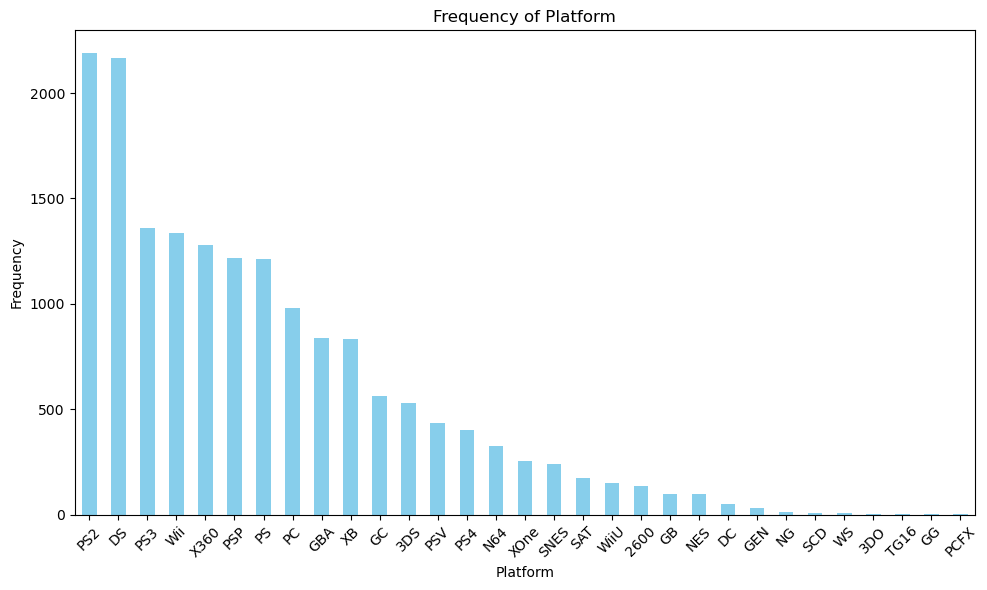

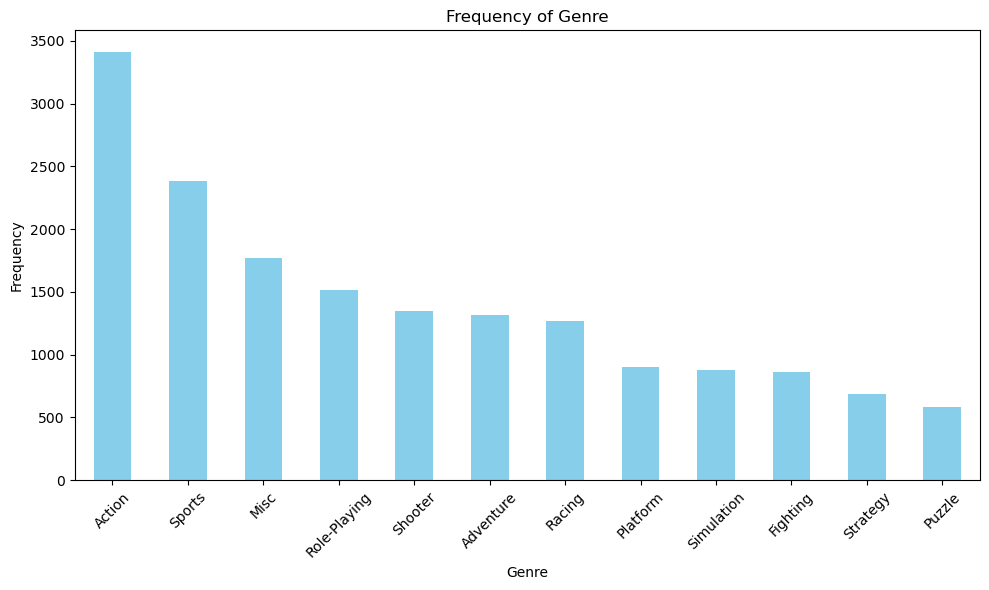

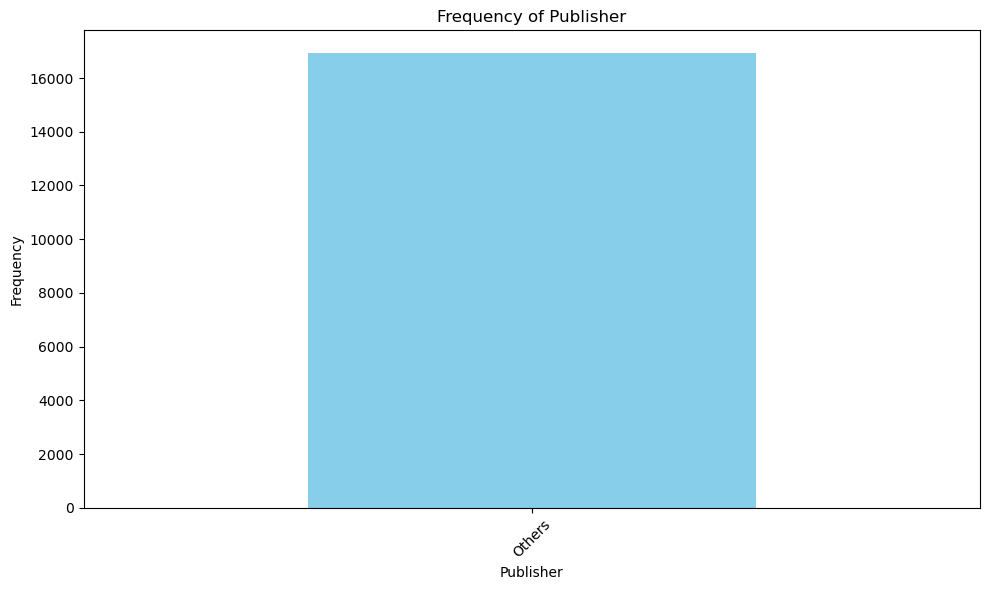

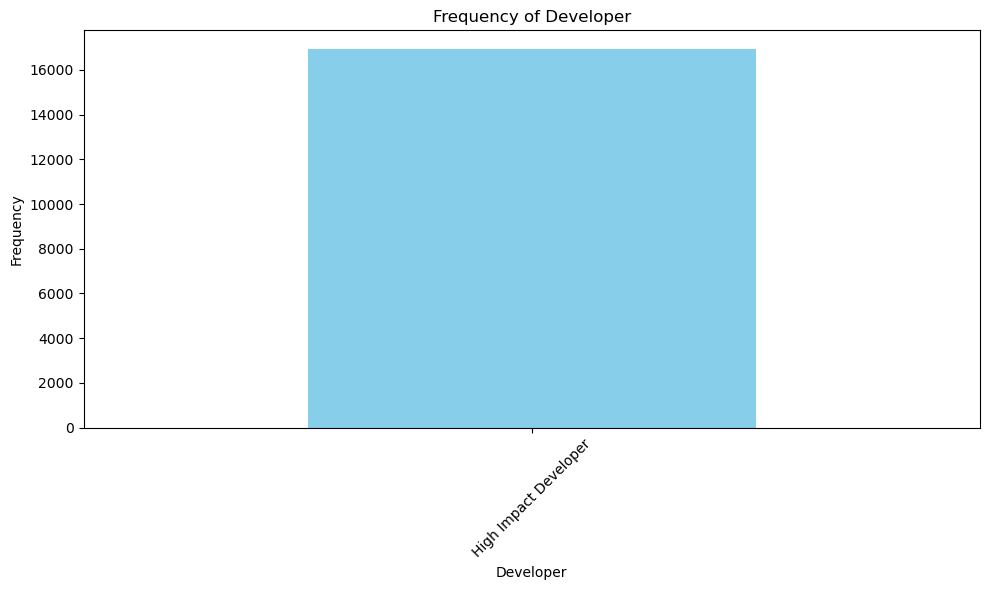

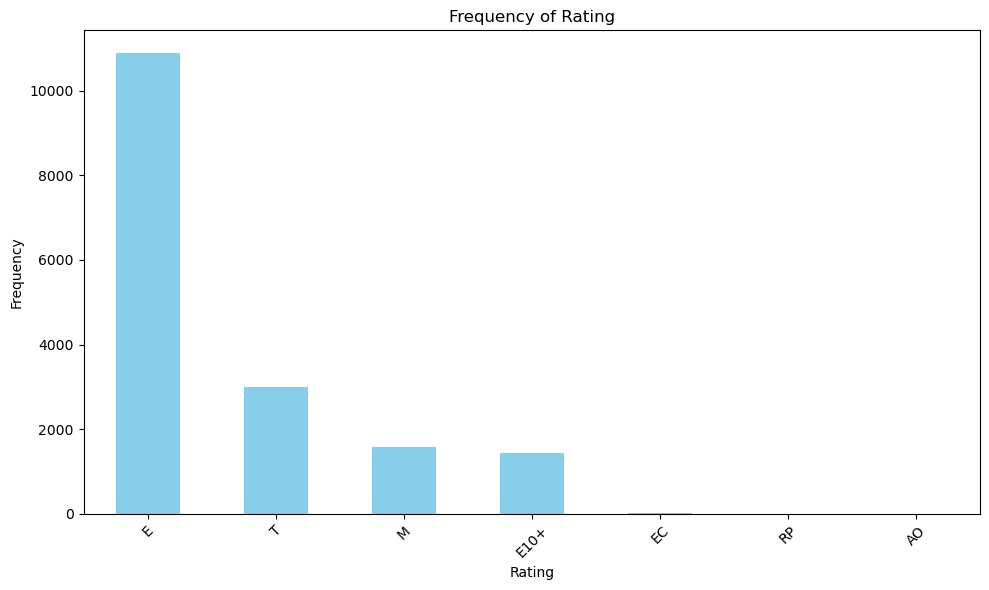

In [170]:
# Kolom-kolom categorical
categorical_columns = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

# Membuat diagram batang untuk setiap kolom
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frequency of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Berikut adalah penjelasan grafik distribusi untuk masing-masing kolom:

1. **Platform**:
   - Grafik menunjukkan bahwa platform seperti PS2 dan DS memiliki jumlah game terbanyak. Platform ini mendominasi pasar dibandingkan platform lainnya seperti Xbox atau GameCube yang memiliki jumlah lebih sedikit.
   - Distribusi ini mencerminkan popularitas beberapa konsol pada eranya.

2. **Genre**:
   - Genre "Action" mendominasi jumlah game yang dirilis, diikuti oleh "Sports" dan "Misc".
   - Genre seperti "Puzzle" dan "Strategy" memiliki jumlah game yang lebih sedikit, menunjukkan preferensi pengembang untuk genre-genre dengan daya tarik pasar yang lebih besar.

3. **Publisher**:
   - Mayoritas publisher dikelompokkan dalam kategori "Others", yang artinya banyak publisher kecil yang tidak termasuk dalam kelompok besar seperti AAA, Indie, atau Casual/Mobile.
   - Publisher AAA mendominasi kategori ini, sementara publisher indie dan casual/mobile game memiliki proporsi yang sangat kecil.

4. **Developer**:
   - Developer dengan kategori "High Impact" dan "Low Impact" memiliki frekuensi yang hampir seimbang, sedangkan "Moderate Impact" memiliki jumlah yang jauh lebih sedikit.
   - Hal ini menunjukkan bahwa sebagian besar developer berada di dua ekstrem, baik yang sangat dominan atau yang dampaknya kecil di pasar.

5. **Rating**:
   - Rating "E" (Everyone) mendominasi distribusi, menunjukkan bahwa banyak game dibuat untuk segala usia.
   - Rating "M" (Mature) dan "T" (Teen) juga cukup signifikan, sementara kategori seperti "AO" (Adults Only) dan "EC" (Early Childhood) sangat jarang ditemukan.

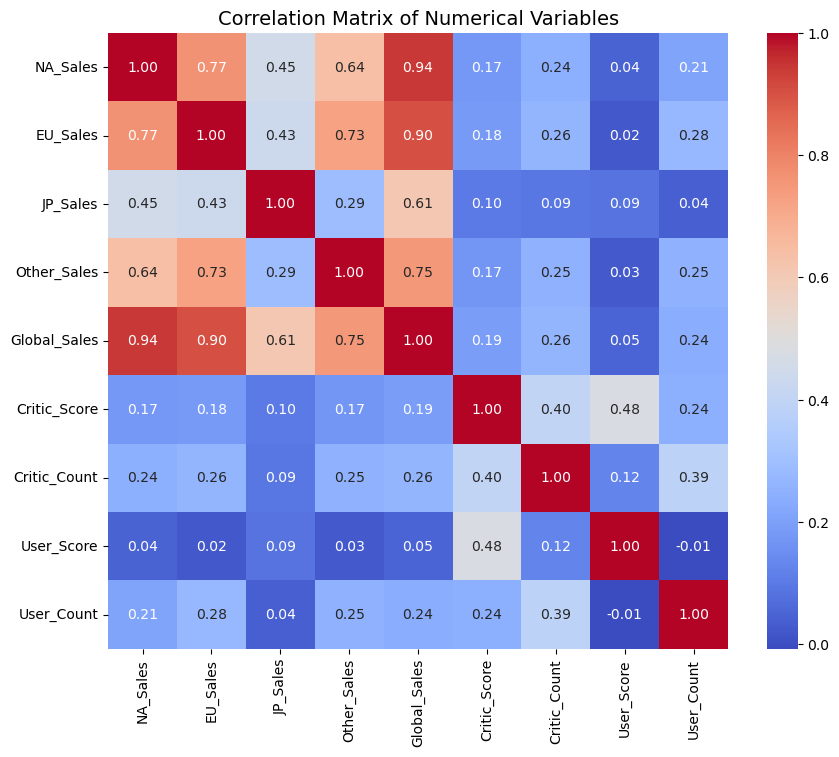

In [162]:
#  Korelasi untuk Kolom Numerik
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Numerical Variables', fontsize=14)
plt.show()

Berikut penjelasan matriks korelasi dengan bahasa sederhana:

1. **Korelasi Positif Tinggi**:
   - `NA_Sales` dan `Global_Sales` memiliki korelasi tinggi sebesar **0.88**. Artinya, semakin tinggi penjualan di wilayah Amerika Utara, semakin tinggi penjualan global. 
   - `EU_Sales` juga sangat berkorelasi dengan `Global_Sales` (**0.81**) dan `Other_Sales` (**0.84**). Jadi, kontribusi wilayah Eropa cukup signifikan terhadap penjualan global.

2. **Korelasi Rendah**:
   - `JP_Sales` memiliki korelasi yang kecil dengan wilayah lain seperti `NA_Sales` (**-0.01**) dan `EU_Sales` (**0.01**). Hal ini menunjukkan bahwa penjualan di Jepang tidak banyak memengaruhi penjualan di wilayah lain atau global.

3. **Hubungan Penjualan Regional dengan Penjualan Global**:
   - Semua variabel penjualan regional (`NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`) memiliki hubungan positif dengan `Global_Sales`. Artinya, meskipun kontribusi Jepang kecil, semuanya tetap berkontribusi terhadap total penjualan global.

4. **Variabel dengan Data Kosong**:
   - Kolom seperti `Critic_Score`, `Critic_Count`, `User_Score`, dan `User_Count` belum terlihat korelasinya karena data kosong. Perlu ditangani lebih lanjut sebelum bisa dimanfaatkan untuk analisis.

In [163]:
# ANALISIS PERTAMA
df['combined_features'] = df['Genre'].fillna('Unknown') + " " + df['Platform'].fillna('Unknown') + " " + df['Rating'].fillna('Unknown')

# Inisialisasi TF-IDF Vectorizer dengan penghapusan stop words bahasa Inggris
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Fungsi sistem rekomendasi
def recommend_games(game_name, data=df, tfidf_matrix=tfidf_matrix):
    if game_name not in data['Name'].values:
        return f"Game '{game_name}' tidak ditemukan dalam dataset."
    
    # Mendapatkan indeks dari game input
    game_idx = data[data['Name'] == game_name].index[0]
    game_features = tfidf_matrix[game_idx]
    sim_scores = cosine_similarity(game_features, tfidf_matrix).flatten()
    
    # Mendapatkan 5 game teratas yang mirip, selain game input itu sendiri
    sim_scores_indices = sim_scores.argsort()[-6:][::-1]
    sim_scores_indices = [i for i in sim_scores_indices if i != game_idx][:5]
    recommendations = data.iloc[sim_scores_indices]['Name'].tolist()
    return recommendations

# Evaluasi dengan 3 input
test_games = ["Wii Sports", "Super Mario Bros.", "Mario Kart Wii"]
recommendations = {game: recommend_games(game) for game in test_games}

# Fungsi untuk menampilkan rekomendasi 
def display_recommendations(recommendations):
    for game, rec_list in recommendations.items():
        print(f"**Input: {game}**")
        if isinstance(rec_list, list):
            print("  - **Rekomendasi:**")
            for i, rec in enumerate(rec_list, start=1):
                print(f"    {i}. {rec}")
        else:
            print(f"  - {rec_list}")  
        
display_recommendations(recommendations)

**Input: Wii Sports**
  - **Rekomendasi:**
    1. Active Life: Extreme Challenge
    2. Basketball Hall Of Fame Ultimate Hoops Challenge
    3. We Love Golf!
    4. Big Beach Sports 2
    5. Mario Tennis
**Input: Super Mario Bros.**
  - **Rekomendasi:**
    1. Mappy
    2. Castlevania Ii: Simon'S Quest
    3. Mega Man
    4. Super Mario Bros. 3
    5. Castlevania Iii: Dracula'S Curse
**Input: Mario Kart Wii**
  - **Rekomendasi:**
    1. Hot Wheels: Track Attack
    2. Speed
    3. Driver: Parallel Lines
    4. Monster Jam: Path Of Destruction
    5. Excite Truck


### **Penjelasan Output**

hasil dari sistem rekomendasi berbasis konten yang memberikan 5 rekomendasi game berdasarkan atribut seperti **Genre**, **Platform**, dan **Rating** dari input game. Berikut adalah analisis untuk setiap input dan rekomendasinya:

---

### **1. Input: Wii Sports**
- **Genre**: Sports
- **Platform**: Wii
- **Rating**: E (Everyone)

#### **Rekomendasi**:
1. **Active Life: Extreme Challenge**
2. **Basketball Hall Of Fame Ultimate Hoops Challenge**
3. **We Love Golf!**
4. **Big Beach Sports 2**
5. **Mario Tennis**

#### **Analisis**:
- Semua game yang direkomendasikan memiliki genre **Sports**, yang relevan dengan **Wii Sports**.
- Platform rekomendasi juga konsisten dengan platform Wii.
- Rekomendasi menargetkan pemain yang menyukai game olahraga berbasis aktivitas, seperti golf, basket, atau tenis.

---

### **2. Input: Super Mario Bros.**
- **Genre**: Platform
- **Platform**: NES
- **Rating**: E (Everyone)

#### **Rekomendasi**:
1. **Mappy**
2. **Castlevania II: Simon's Quest**
3. **Mega Man**
4. **Super Mario Bros. 3**
5. **Castlevania III: Dracula's Curse**

#### **Analisis**:
- Semua game dalam daftar rekomendasi adalah game bergenre **Platform** atau petualangan dengan elemen serupa.
- Platform **NES** konsisten dengan game input.
- Game seperti **Mega Man** dan **Castlevania** adalah judul klasik yang sering disukai oleh pemain dari era yang sama dengan Super Mario Bros.

---

### **3. Input: Mario Kart Wii**
- **Genre**: Racing
- **Platform**: Wii
- **Rating**: E (Everyone)

#### **Rekomendasi**:
1. **Hot Wheels: Track Attack**
2. **Speed**
3. **Driver: Parallel Lines**
4. **Monster Jam: Path Of Destruction**
5. **Excite Truck**

#### **Analisis**:
- Genre **Racing** menjadi fokus utama dalam rekomendasi ini, konsisten dengan karakteristik **Mario Kart Wii**.
- Semua rekomendasi berfokus pada balapan atau game berbasis kendaraan, seperti **Hot Wheels** dan **Monster Jam**.
- Platform Wii juga konsisten, memastikan bahwa rekomendasi sesuai dengan perangkat input.